# Some Important Points: 🔋 


1.   V(max) = 4.2 volt
2.   V(min) = 2.8/2.7 Volt
3.   Nominal Charge capacity = 2500 mA/2.5Ah 
4.   SOC = Normal Capacity at that point/Nominal capacity
5.   Nominal Capacity - ammount of charged deliverd by fully charge batter, when it is fresh. OR **we can say Total capacity of battery.**
6.   SOH = Maximum of SOC at one cycle.
7.   we can find SOH by making set of loops in dataset and then find max(SOC).


# Models 📌


1.   (DNN) Deep Neural Network 
2.   LSTM
3.   CNN
4.   GPR (Gaussian Progress Rregressor)
5.   Genetic Algorithms
6.   Support Vector Regressor
7.   Random Forest



# Model Partitioning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
import random
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Reading the data
df = pd.read_csv("trial1.csv")
df.head(5)

,Time/sec,Potential/V,Current/A,Charge/C,Capacity/Ah,Nominal_Capacity/Ah
0,0.4,3.54,1.25,0.00,0.0,2.5
1,1.0,3.54,1.25,0.95,0.0,2.5
2,2.0,3.54,1.25,2.28,0.0,2.5
3,3.0,3.55,1.25,3.46,0.0,2.5
4,4.0,3.55,1.25,4.64,0.0,2.5


In [3]:
df.rename(columns= {'Time/sec':'Time', 'Potential/V':'Potential', 'Current/A':'Current', 'Charge/C':'Charge',
                    'Capacity/Ah':'Capacity', 'Nominal_Capacity/Ah':'Nominal_Capacity'},inplace=True)

In [4]:
df.insert(loc = 6,column ='SOC',value=df['Capacity']/df['Nominal_Capacity']) 

In [5]:
df.head()

,Time,Potential,Current,Charge,Capacity,Nominal_Capacity,SOC
0,0.4,3.54,1.25,0.00,0.0,2.5,0.0
1,1.0,3.54,1.25,0.95,0.0,2.5,0.0
2,2.0,3.54,1.25,2.28,0.0,2.5,0.0
3,3.0,3.55,1.25,3.46,0.0,2.5,0.0
4,4.0,3.55,1.25,4.64,0.0,2.5,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242885 entries, 0 to 242884
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Time              242885 non-null  float64
 1   Potential         242885 non-null  float64
 2   Current           242885 non-null  float64
 3   Charge            242885 non-null  float64
 4   Capacity          242885 non-null  float64
 5   Nominal_Capacity  242885 non-null  float64
 6   SOC               242885 non-null  float64
dtypes: float64(7)
memory usage: 13.0 MB


In [ ]:
df.isnull().sum()

Time                0
Potential           0
Current             0
Charge              0
Capacity            0
Nominal_Capacity    0
SOC                 0
dtype: int64

In [7]:
df.describe()

,Time,Potential,Current,Charge,Capacity,Nominal_Capacity,SOC
count,242885.000000,242885.000000,242885.000000,242885.000000,242885.000000,242885.0,242885.000000
mean,124950.840426,3.839404,0.034547,5083.012369,1.412284,2.5,0.564913
std,72231.050997,0.385144,1.234725,3185.178306,0.884470,0.0,0.353788
min,0.400000,2.750000,-2.500000,0.000000,0.000000,2.5,0.000000
25%,62490.800000,3.440000,0.000000,1920.000000,0.530000,2.5,0.212000
50%,124983.000000,3.940000,0.080000,5790.000000,1.610000,2.5,0.644000
75%,187475.100000,4.200000,1.250000,8280.000000,2.300000,2.5,0.920000
max,249967.200000,4.200000,1.260000,8680.000000,2.410000,2.5,0.964000


# Normalizing the Values 

In [8]:
callback = EarlyStopping(
    monitor = 'val_loss' ,
    min_delta = 0.00001,
    patience = 10,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False
)

In [9]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numericals = ['Time','Potential','Current','Charge','SOC'] # Not Normalizing the Y(target Variable) - which is SOC
df[numericals] = scaler.fit_transform(df[numericals])

In [10]:
df.head()

,Time,Potential,Current,Charge,Capacity,Nominal_Capacity,SOC
0,0.000000,0.544828,0.99734,0.000000,0.0,2.5,0.0
1,0.000002,0.544828,0.99734,0.000109,0.0,2.5,0.0
2,0.000006,0.544828,0.99734,0.000263,0.0,2.5,0.0
3,0.000010,0.551724,0.99734,0.000399,0.0,2.5,0.0
4,0.000014,0.551724,0.99734,0.000535,0.0,2.5,0.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242885 entries, 0 to 242884
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Time              242885 non-null  float64
 1   Potential         242885 non-null  float64
 2   Current           242885 non-null  float64
 3   Charge            242885 non-null  float64
 4   Capacity          242885 non-null  float64
 5   Nominal_Capacity  242885 non-null  float64
 6   SOC               242885 non-null  float64
dtypes: float64(7)
memory usage: 13.0 MB


# Spliting the Data into train and test

In [12]:
Y = df.pop('Capacity')
X = df

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [14]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((194308, 6), (48577, 6), (194308,), (48577,))

In [15]:
def plot_his(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

# DNN

## Model 1
Normal Deep earning neural network
with 3 layers and relu activation

In [27]:
%%time
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([tf.keras.layers.Dense(50, activation='linear'),
                               tf.keras.layers.Dense(20, activation = 'relu'),
                               tf.keras.layers.Dense(1,'linear')])

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse'])

history_1 = model_1.fit(X_train,Y_train, epochs= 200,validation_data=(X_test,Y_test), callbacks = callback)

Epoch 1/200
6073/6073 [==============================] - 7s 1ms/step - loss: 0.0155 - rmse: 0.1123 - mae: 0.0155 - mse: 0.0126 - val_loss: 0.0052 - val_rmse: 0.0057 - val_mae: 0.0052 - val_mse: 3.2840e-05
Epoch 2/200
6073/6073 [==============================] - 6s 1ms/step - loss: 0.0034 - rmse: 0.0043 - mae: 0.0034 - mse: 1.8431e-05 - val_loss: 0.0028 - val_rmse: 0.0034 - val_mae: 0.0028 - val_mse: 1.1369e-05
Epoch 3/200
6073/6073 [==============================] - 7s 1ms/step - loss: 0.0025 - rmse: 0.0032 - mae: 0.0025 - mse: 1.0322e-05 - val_loss: 0.0015 - val_rmse: 0.0018 - val_mae: 0.0015 - val_mse: 3.3340e-06
Epoch 4/200
6073/6073 [==============================] - 7s 1ms/step - loss: 0.0021 - rmse: 0.0027 - mae: 0.0021 - mse: 7.1367e-06 - val_loss: 0.0014 - val_rmse: 0.0016 - val_mae: 0.0014 - val_mse: 2.6879e-06
Epoch 5/200
6073/6073 [==============================] - 7s 1ms/step - loss: 0.0019 - rmse: 0.0024 - mae: 0.0019 - mse: 5.7111e-06 - val_loss: 0.0015 - val_rmse: 0.0018

6073/6073 [==============================] - 6s 994us/step - loss: 1.8453e-04 - rmse: 2.3334e-04 - mae: 1.8453e-04 - mse: 5.4449e-08 - val_loss: 1.8796e-04 - val_rmse: 2.2643e-04 - val_mae: 1.8796e-04 - val_mse: 5.1270e-08
Epoch 74/200
6073/6073 [==============================] - 6s 989us/step - loss: 1.7756e-04 - rmse: 2.2402e-04 - mae: 1.7756e-04 - mse: 5.0187e-08 - val_loss: 1.2704e-04 - val_rmse: 1.5747e-04 - val_mae: 1.2704e-04 - val_mse: 2.4797e-08
Epoch 75/200
6073/6073 [==============================] - 6s 996us/step - loss: 1.7494e-04 - rmse: 2.2231e-04 - mae: 1.7494e-04 - mse: 4.9421e-08 - val_loss: 1.2362e-04 - val_rmse: 1.5296e-04 - val_mae: 1.2362e-04 - val_mse: 2.3398e-08
Epoch 76/200
6073/6073 [==============================] - 6s 991us/step - loss: 1.6517e-04 - rmse: 2.0784e-04 - mae: 1.6517e-04 - mse: 4.3199e-08 - val_loss: 3.8667e-04 - val_rmse: 4.1541e-04 - val_mae: 3.8667e-04 - val_mse: 1.7257e-07
Epoch 77/200
6073/6073 [==============================] - 6s 985us/st

In [28]:
model_1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 50)                350       
                                                                 
 dense_25 (Dense)            (None, 20)                1020      
                                                                 
 dense_26 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1,391
Trainable params: 1,391
Non-trainable params: 0
_________________________________________________________________


In [29]:
model_1.evaluate(X_test,Y_test)

1519/1519 [==============================] - 1s 708us/step - loss: 2.0196e-04 - rmse: 2.1102e-04 - mae: 2.0196e-04 - mse: 4.4530e-08


[0.00020195670367684215,
 0.00021102101891301572,
 0.00020195670367684215,
 4.4529869569487346e-08]

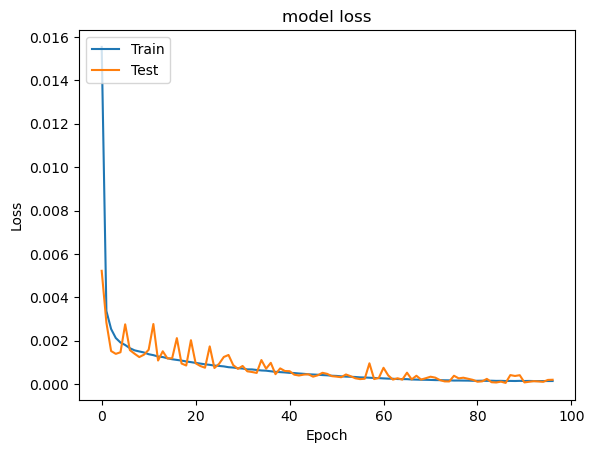

In [30]:
plot_his(history_1)

In [31]:
prediction = model_1.predict(X_test)
print(prediction[:10])

1519/1519 [==============================] - 1s 588us/step
[[0.04993804]
 [2.3398054 ]
 [2.0797942 ]
 [2.389751  ]
 [2.3198037 ]
 [1.2998098 ]
 [2.339681  ]
 [0.8097692 ]
 [0.00990953]
 [1.7897793 ]]


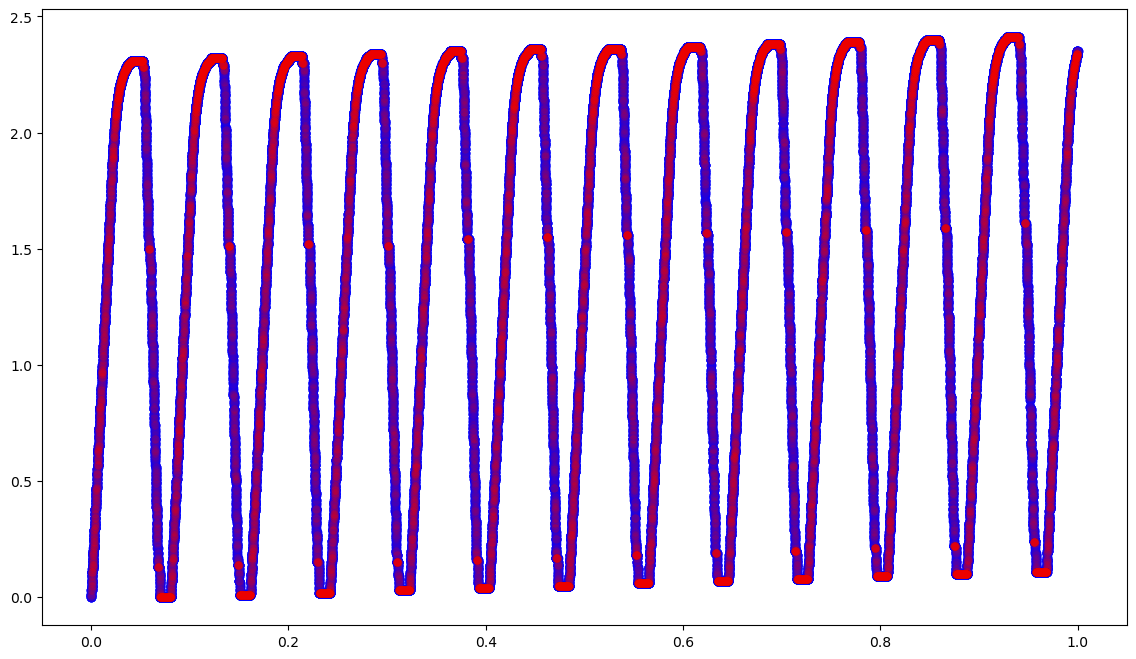

In [32]:
plt.figure(figsize=(14,8))
plt.scatter(X_test['Time'],Y_test,color='blue')
plt.scatter(X_test['Time'],prediction,color='red',alpha=0.05,linewidths=0.02)
plt.show()

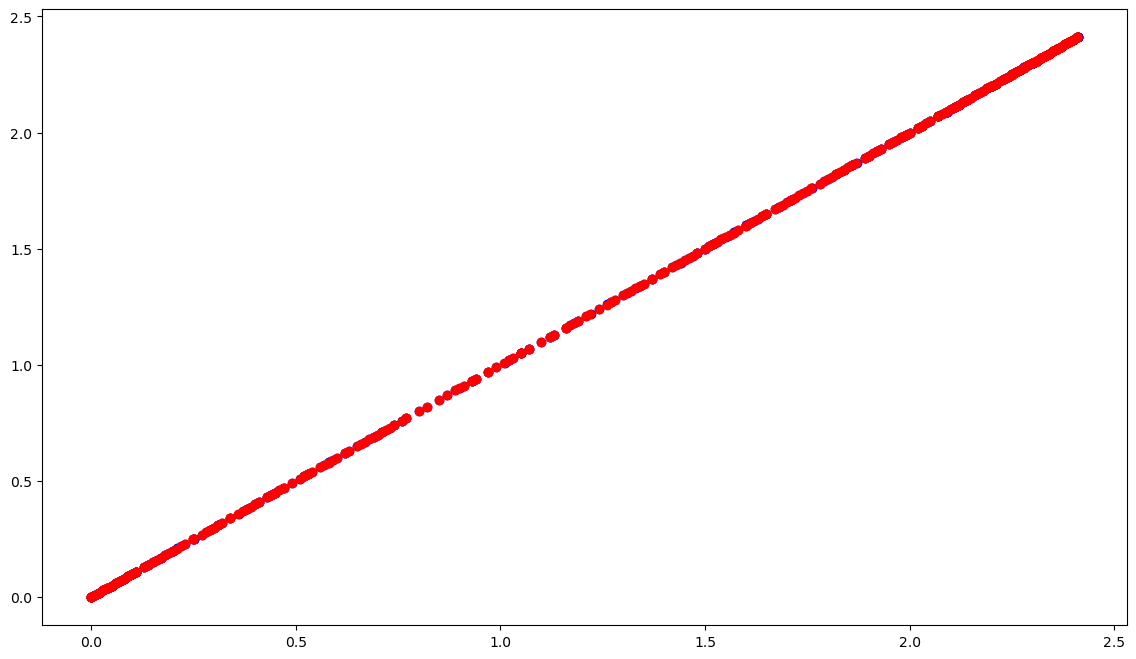

In [33]:
plt.figure(figsize=(14,8))
plt.scatter(Y_test[300:900], Y_test[300:900], color='blue')
plt.scatter(prediction[300:900], prediction[300:900], color='red')
plt.show()

## Model_1_1

In [34]:
tf.random.set_seed(42)

model__1_1 = tf.keras.Sequential([tf.keras.layers.Dense(50, activation='linear'),
                                  tf.keras.layers.Dense(30, activation='linear'),
                                  tf.keras.layers.Dense(10, activation = 'linear'),
                                  tf.keras.layers.Dense(1,activation = 'linear')])

model__1_1.compile(loss = tf.keras.metrics.mean_squared_error,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay = 0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse'])

#here using callback feature
history_1_1 = model__1_1.fit(X_train,Y_train, epochs= 100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
6073/6073 [==============================] - 8s 1ms/step - loss: 0.0053 - rmse: 0.0731 - mae: 0.0108 - mse: 0.0053 - val_loss: 7.3540e-06 - val_rmse: 0.0027 - val_mae: 0.0022 - val_mse: 7.3540e-06
Epoch 2/100
6073/6073 [==============================] - 7s 1ms/step - loss: 2.1036e-05 - rmse: 0.0046 - mae: 0.0036 - mse: 2.1036e-05 - val_loss: 5.6004e-05 - val_rmse: 0.0075 - val_mae: 0.0066 - val_mse: 5.6004e-05
Epoch 3/100
6073/6073 [==============================] - 7s 1ms/step - loss: 1.4189e-05 - rmse: 0.0038 - mae: 0.0030 - mse: 1.4189e-05 - val_loss: 4.2277e-06 - val_rmse: 0.0021 - val_mae: 0.0018 - val_mse: 4.2277e-06
Epoch 4/100
6073/6073 [==============================] - 7s 1ms/step - loss: 1.0522e-05 - rmse: 0.0032 - mae: 0.0026 - mse: 1.0522e-05 - val_loss: 3.5142e-05 - val_rmse: 0.0059 - val_mae: 0.0056 - val_mse: 3.5142e-05
Epoch 5/100
6073/6073 [==============================] - 7s 1ms/step - loss: 8.4444e-06 - rmse: 0.0029 - mae: 0.0023 - mse: 8.4444e-06 - val

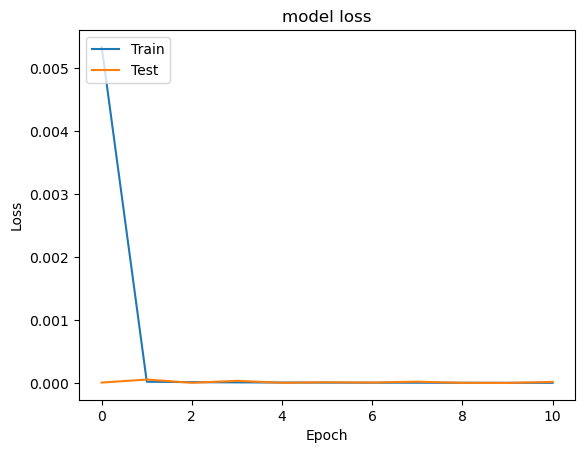

In [35]:
plot_his(history_1_1)

In [ ]:
prediction_1_1 = model__1_1.predict(X_test)
print(prediction_1_1[:10])

1519/1519 [==============================] - 2s 1ms/step
[[2.2640636 ]
 [1.62339   ]
 [0.10064343]
 [1.774422  ]
 [2.4149017 ]
 [0.09022593]
 [1.9153459 ]
 [1.3930659 ]
 [1.8246545 ]
 [2.3140993 ]]


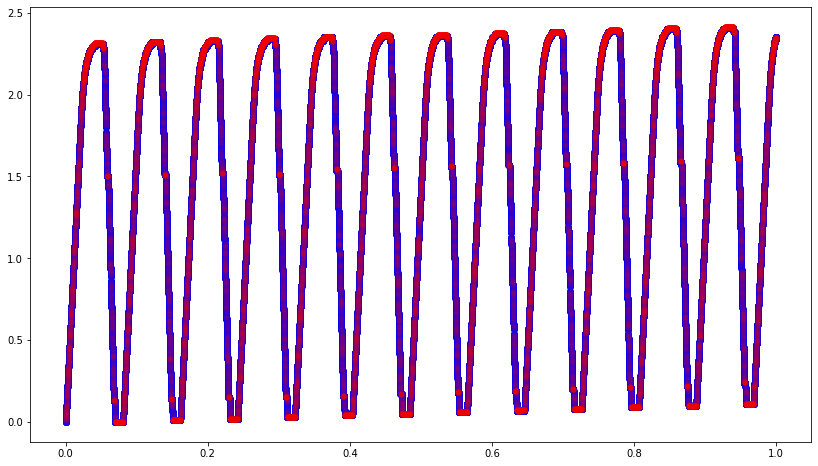

In [ ]:
plt.figure(figsize=(14,8))
plt.scatter(X_test['Time'],Y_test,color='blue')
plt.scatter(X_test['Time'],prediction_1_1,color='red',alpha=0.05,linewidths=0.02)
plt.show()

In [40]:
%%time
tf.random.set_seed(42)

model__1_2 = tf.keras.Sequential([tf.keras.layers.Dense(50, activation='linear'),
                                  tf.keras.layers.Dense(20, activation = 'linear'),
                                  tf.keras.layers.Dense(1,activation = 'linear')])

model__1_2.compile(loss = tf.keras.metrics.mean_squared_error,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01,decay = 0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse'])

#here using callback feature
history_1_2 = model__1_2.fit(X_train,Y_train, epochs= 100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
6073/6073 [==============================] - 8s 1ms/step - loss: 0.0063 - rmse: 0.0794 - mae: 0.0082 - mse: 0.0063 - val_loss: 1.0523e-04 - val_rmse: 0.0103 - val_mae: 0.0099 - val_mse: 1.0523e-04
Epoch 2/100
6073/6073 [==============================] - 7s 1ms/step - loss: 1.0576e-04 - rmse: 0.0103 - mae: 0.0065 - mse: 1.0576e-04 - val_loss: 2.9386e-04 - val_rmse: 0.0171 - val_mae: 0.0154 - val_mse: 2.9386e-04
Epoch 3/100
6073/6073 [==============================] - 8s 1ms/step - loss: 4.1302e-05 - rmse: 0.0064 - mae: 0.0044 - mse: 4.1302e-05 - val_loss: 2.2728e-04 - val_rmse: 0.0151 - val_mae: 0.0139 - val_mse: 2.2728e-04
Epoch 4/100
6073/6073 [==============================] - 8s 1ms/step - loss: 2.9405e-05 - rmse: 0.0054 - mae: 0.0032 - mse: 2.9405e-05 - val_loss: 3.5798e-05 - val_rmse: 0.0060 - val_mae: 0.0050 - val_mse: 3.5798e-05
Epoch 5/100
6073/6073 [==============================] - 6s 1ms/step - loss: 1.5974e-05 - rmse: 0.0040 - mae: 0.0029 - mse: 1.5974e-05 - val

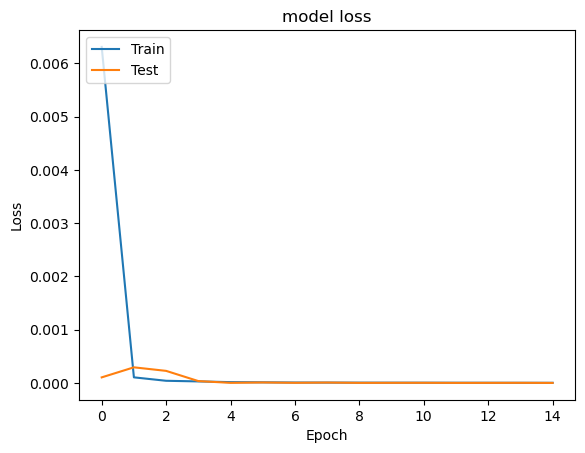

In [41]:
plot_his(history_1_2)

# LSTM
LSTM ( Long short term memory)


## Model 2

In [101]:
%%time
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([tf.keras.layers.LSTM(50,activation= 'relu',return_sequences=True, input_shape=(6,1)),
                               tf.keras.layers.LSTM(10,activation='relu'),
                               tf.keras.layers.Dense(1)])

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse'])

history_2 = model_2.fit(X_train,Y_train,epochs=30,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/30
6073/6073 [==============================] - 35s 5ms/step - loss: 0.0460 - rmse: 0.1544 - mae: 0.0460 - mse: 0.0238 - val_loss: 0.0225 - val_rmse: 0.0237 - val_mae: 0.0225 - val_mse: 5.6223e-04
Epoch 2/30
6073/6073 [==============================] - 33s 5ms/step - loss: 0.0093 - rmse: 0.0124 - mae: 0.0093 - mse: 1.5262e-04 - val_loss: 0.0053 - val_rmse: 0.0065 - val_mae: 0.0053 - val_mse: 4.2311e-05
Epoch 3/30
6073/6073 [==============================] - 32s 5ms/step - loss: 0.0065 - rmse: 0.0086 - mae: 0.0065 - mse: 7.4801e-05 - val_loss: 0.0034 - val_rmse: 0.0044 - val_mae: 0.0034 - val_mse: 1.9213e-05
Epoch 4/30
6073/6073 [==============================] - 33s 5ms/step - loss: 0.0051 - rmse: 0.0066 - mae: 0.0051 - mse: 4.3941e-05 - val_loss: 0.0122 - val_rmse: 0.0130 - val_mae: 0.0122 - val_mse: 1.6932e-04
Epoch 5/30
6073/6073 [==============================] - 33s 5ms/step - loss: 0.0042 - rmse: 0.0054 - mae: 0.0042 - mse: 2.9371e-05 - val_loss: 0.0028 - val_rmse: 0.0036

In [102]:
model_2.evaluate(X_test,Y_test)

1519/1519 [==============================] - 3s 2ms/step - loss: 0.0011 - rmse: 0.0015 - mae: 0.0011 - mse: 2.2860e-06


[0.0010934342863038182,
 0.0015119393356144428,
 0.0010934342863038182,
 2.285960590597824e-06]

In [103]:
model_2.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 6, 50)             10400     
                                                                 
 lstm_5 (LSTM)               (None, 10)                2440      
                                                                 
 dense_61 (Dense)            (None, 1)                 11        
                                                                 
Total params: 12,851
Trainable params: 12,851
Non-trainable params: 0
_________________________________________________________________


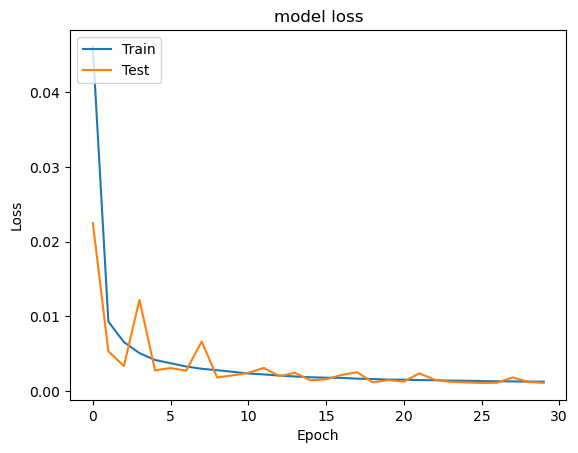

In [104]:
plot_his(history_2)

In [105]:
prediction_2 = model_2.predict(X_test)
print(prediction_2[:20])

1519/1519 [==============================] - 3s 2ms/step
[[0.05220103]
 [2.3399248 ]
 [2.0812035 ]
 [2.3910823 ]
 [2.3204765 ]
 [1.2988119 ]
 [2.3390236 ]
 [0.80909514]
 [0.00859274]
 [1.7890015 ]
 [0.94929266]
 [2.3589995 ]
 [0.09878635]
 [1.8282988 ]
 [2.059608  ]
 [0.28557062]
 [1.9484394 ]
 [2.3103647 ]
 [1.7672917 ]
 [1.5582658 ]]


In [47]:
# plt.figure(figsize=(10, 8))
# plt.title('Test set')
# plt.xlabel('Cycle')
# plt.ylabel('SOH (%)')
# plt.plot(X_test['Time'],prediction_2,label='Prediction')
# plt.plot(X_test['Time'],Y_test,label='Actual')
# plt.legend()

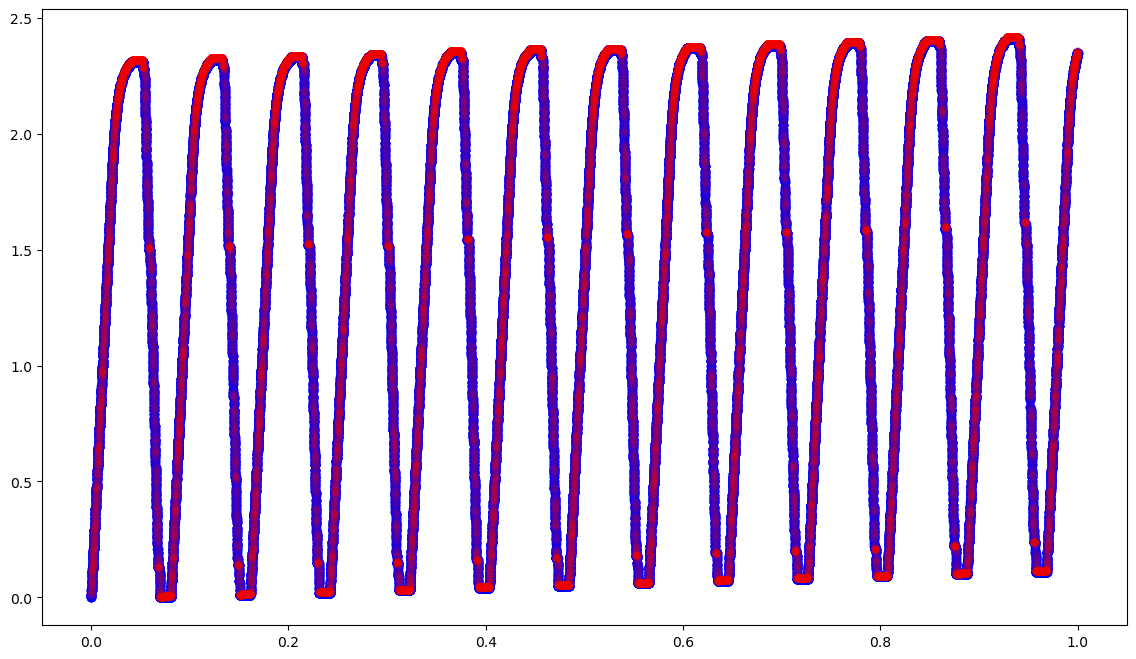

In [48]:
plt.figure(figsize=(14,8))
plt.scatter(X_test['Time'],Y_test,color='blue')
plt.scatter(X_test['Time'],prediction_2,color='red',alpha=0.05,linewidths=0.02)
plt.show()

## Model 3
Best

In [49]:
%%time
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([tf.keras.layers.LSTM(70,activation= 'relu',return_sequences=True, input_shape=(6,1)),
                               tf.keras.layers.LSTM(30,activation= 'relu'),
                               tf.keras.layers.Dense(20,activation='relu'),
                               tf.keras.layers.Dense(1,activation='linear')])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay = 0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse'])

history_3 = model_3.fit(X_train,Y_train,epochs=40,validation_data=(X_test,Y_test))

Epoch 1/40
6073/6073 [==============================] - 35s 5ms/step - loss: 0.0386 - rmse: 0.1401 - mae: 0.0386 - mse: 0.0196 - val_loss: 0.0095 - val_rmse: 0.0109 - val_mae: 0.0095 - val_mse: 1.1968e-04
Epoch 2/40
6073/6073 [==============================] - 30s 5ms/step - loss: 0.0095 - rmse: 0.0124 - mae: 0.0095 - mse: 1.5349e-04 - val_loss: 0.0153 - val_rmse: 0.0163 - val_mae: 0.0153 - val_mse: 2.6732e-04
Epoch 3/40
6073/6073 [==============================] - 30s 5ms/step - loss: 0.0066 - rmse: 0.0087 - mae: 0.0066 - mse: 7.5233e-05 - val_loss: 0.0105 - val_rmse: 0.0121 - val_mae: 0.0105 - val_mse: 1.4579e-04
Epoch 4/40
6073/6073 [==============================] - 32s 5ms/step - loss: 0.0053 - rmse: 0.0068 - mae: 0.0053 - mse: 4.6657e-05 - val_loss: 0.0071 - val_rmse: 0.0074 - val_mae: 0.0071 - val_mse: 5.4292e-05
Epoch 5/40
6073/6073 [==============================] - 33s 5ms/step - loss: 0.0042 - rmse: 0.0055 - mae: 0.0042 - mse: 3.0193e-05 - val_loss: 0.0040 - val_rmse: 0.0044

In [50]:
model_3.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 6, 70)             20160     
                                                                 
 lstm_3 (LSTM)               (None, 30)                12120     
                                                                 
 dense_43 (Dense)            (None, 20)                620       
                                                                 
 dense_44 (Dense)            (None, 1)                 21        
                                                                 
Total params: 32,921
Trainable params: 32,921
Non-trainable params: 0
_________________________________________________________________


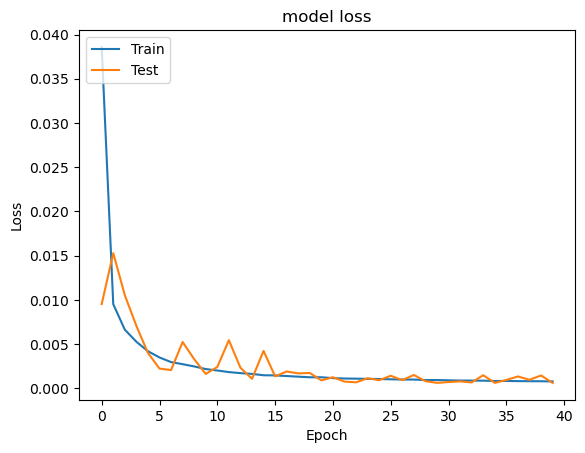

In [51]:
plot_his(history_3)

In [52]:
%%time
model_3.evaluate(X_test,Y_test)

1519/1519 [==============================] - 3s 2ms/step - loss: 6.2049e-04 - rmse: 8.5137e-04 - mae: 6.2049e-04 - mse: 7.2484e-07
CPU times: total: 5.92 s
Wall time: 2.94 s


[0.0006204881356097758,
 0.0008513736538589001,
 0.0006204881356097758,
 7.248370934576087e-07]

In [53]:
prediction_3 = model_3.predict(X_test)

1519/1519 [==============================] - 3s 2ms/step


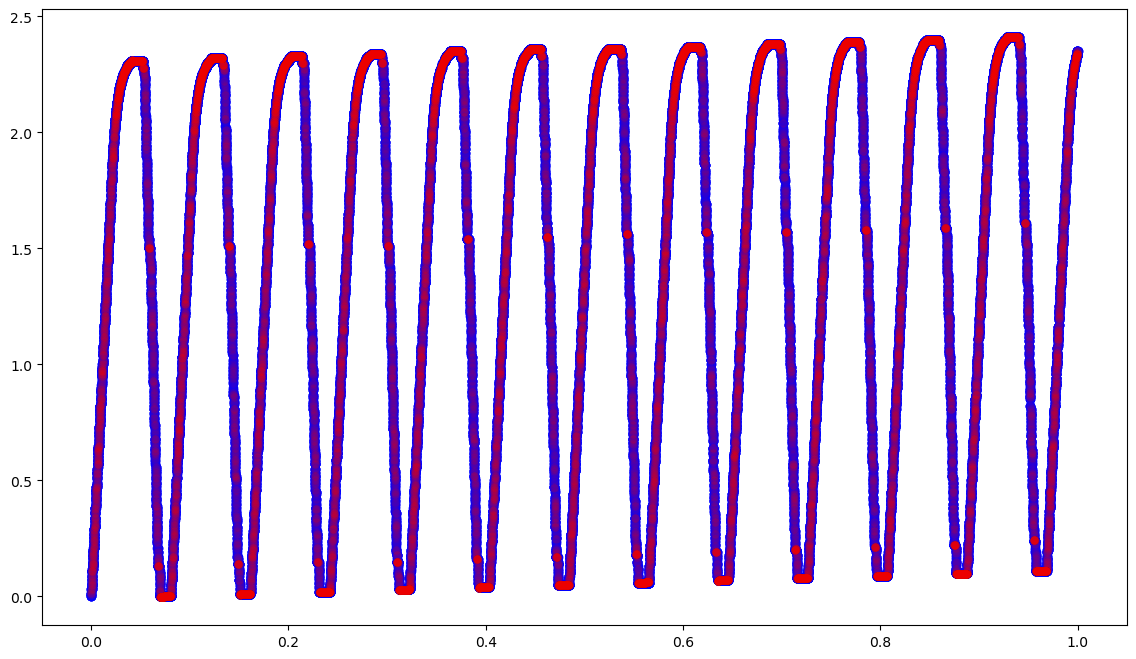

In [54]:
plt.figure(figsize=(14,8))
plt.scatter(X_test['Time'],Y_test,color='blue')
plt.scatter(X_test['Time'],prediction_3,color='red',alpha=0.05,linewidths=0.02)
plt.show()

# CNN

## Model 4
CNN

In [56]:
%%time
model_4 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,3,activation='linear',input_shape=(6,1)),
                               tf.keras.layers.Conv1D(10,3,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(1)])

model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse'])

history_4 = model_4.fit(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test),callbacks=callback)

Epoch 1/50
6073/6073 [==============================] - 8s 1ms/step - loss: 0.0224 - rmse: 0.1348 - mae: 0.0224 - mse: 0.0182 - val_loss: 0.0027 - val_rmse: 0.0032 - val_mae: 0.0027 - val_mse: 1.0086e-05
Epoch 2/50
6073/6073 [==============================] - 7s 1ms/step - loss: 0.0035 - rmse: 0.0043 - mae: 0.0035 - mse: 1.8630e-05 - val_loss: 0.0045 - val_rmse: 0.0054 - val_mae: 0.0045 - val_mse: 2.9184e-05
Epoch 3/50
6073/6073 [==============================] - 7s 1ms/step - loss: 0.0032 - rmse: 0.0040 - mae: 0.0032 - mse: 1.5811e-05 - val_loss: 0.0027 - val_rmse: 0.0034 - val_mae: 0.0027 - val_mse: 1.1426e-05
Epoch 4/50
6073/6073 [==============================] - 7s 1ms/step - loss: 0.0031 - rmse: 0.0038 - mae: 0.0031 - mse: 1.4778e-05 - val_loss: 0.0026 - val_rmse: 0.0031 - val_mae: 0.0026 - val_mse: 9.5787e-06
Epoch 5/50
6073/6073 [==============================] - 8s 1ms/step - loss: 0.0031 - rmse: 0.0038 - mae: 0.0031 - mse: 1.4086e-05 - val_loss: 0.0027 - val_rmse: 0.0031 - va

In [57]:
model_4.evaluate(X_test,Y_test)

1519/1519 [==============================] - 1s 752us/step - loss: 0.0023 - rmse: 0.0028 - mae: 0.0023 - mse: 7.9884e-06


[0.0023064985871315002,
 0.002826369134709239,
 0.0023064985871315002,
 7.988362085598055e-06]

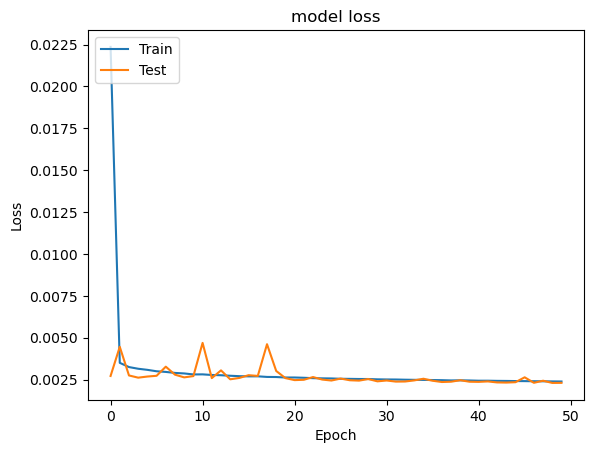

In [58]:
plot_his(history_4)

In [59]:
prediction_4 = model_4.predict(X_test)

1519/1519 [==============================] - 1s 606us/step


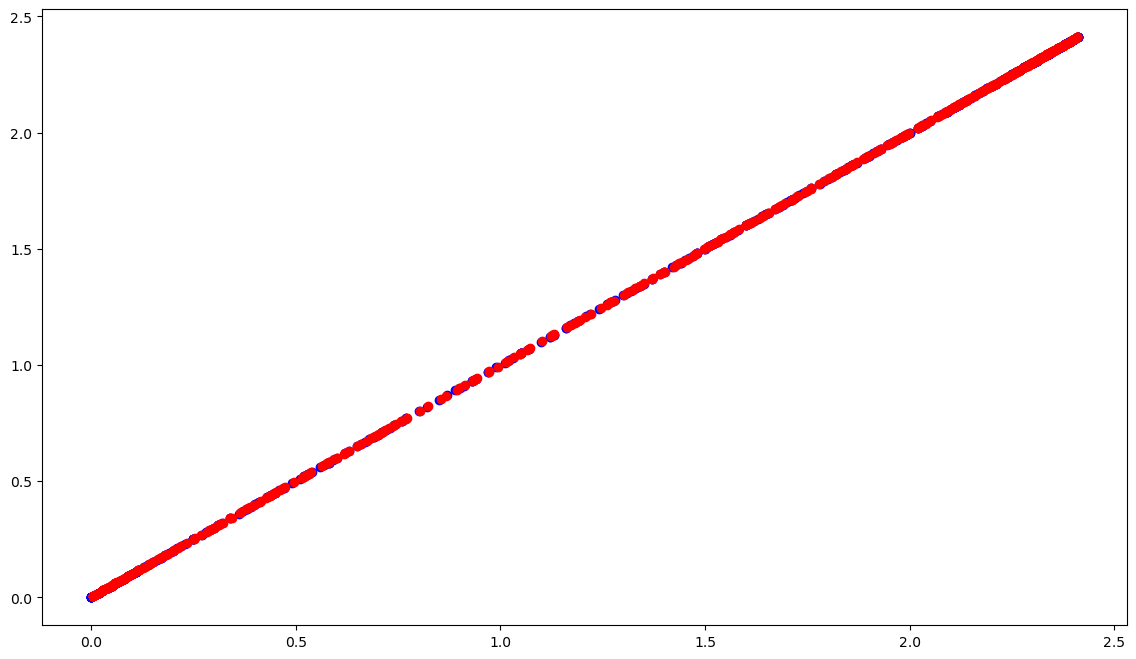

In [60]:
plt.figure(figsize=(14,8))
plt.scatter(Y_test[300:900], Y_test[300:900], color='blue')
plt.scatter(prediction_4[300:900], prediction_4[300:900], color='red')
plt.show()

## Model 5 (Best)

In [61]:
%%time
model_5 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,2,activation='relu',input_shape=(6,1)),
                               tf.keras.layers.Conv1D(10,3,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(20),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1,activation='linear')])

model_5.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse'])

history_5 = model_5.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
6073/6073 [==============================] - 8s 1ms/step - loss: 0.0161 - rmse: 0.1054 - mae: 0.0161 - mse: 0.0111 - val_loss: 0.0060 - val_rmse: 0.0068 - val_mae: 0.0060 - val_mse: 4.6567e-05
Epoch 2/100
6073/6073 [==============================] - 8s 1ms/step - loss: 0.0044 - rmse: 0.0056 - mae: 0.0044 - mse: 3.1818e-05 - val_loss: 0.0034 - val_rmse: 0.0042 - val_mae: 0.0034 - val_mse: 1.7347e-05
Epoch 3/100
6073/6073 [==============================] - 8s 1ms/step - loss: 0.0033 - rmse: 0.0042 - mae: 0.0033 - mse: 1.7772e-05 - val_loss: 0.0024 - val_rmse: 0.0030 - val_mae: 0.0024 - val_mse: 8.7590e-06
Epoch 4/100
6073/6073 [==============================] - 8s 1ms/step - loss: 0.0028 - rmse: 0.0035 - mae: 0.0028 - mse: 1.2351e-05 - val_loss: 0.0018 - val_rmse: 0.0023 - val_mae: 0.0018 - val_mse: 5.1315e-06
Epoch 5/100
6073/6073 [==============================] - 8s 1ms/step - loss: 0.0025 - rmse: 0.0031 - mae: 0.0025 - mse: 9.5513e-06 - val_loss: 0.0023 - val_rmse: 0.0028

Epoch 40/100
6073/6073 [==============================] - 8s 1ms/step - loss: 9.0936e-04 - rmse: 0.0012 - mae: 9.0936e-04 - mse: 1.3257e-06 - val_loss: 8.4648e-04 - val_rmse: 0.0011 - val_mae: 8.4648e-04 - val_mse: 1.1218e-06
Epoch 41/100
6073/6073 [==============================] - 8s 1ms/step - loss: 8.8688e-04 - rmse: 0.0011 - mae: 8.8688e-04 - mse: 1.2596e-06 - val_loss: 0.0021 - val_rmse: 0.0023 - val_mae: 0.0021 - val_mse: 5.2698e-06
Epoch 42/100
6073/6073 [==============================] - 8s 1ms/step - loss: 8.6542e-04 - rmse: 0.0011 - mae: 8.6542e-04 - mse: 1.2012e-06 - val_loss: 8.2440e-04 - val_rmse: 0.0010 - val_mae: 8.2440e-04 - val_mse: 1.1014e-06
Epoch 43/100
6073/6073 [==============================] - 8s 1ms/step - loss: 8.5525e-04 - rmse: 0.0011 - mae: 8.5525e-04 - mse: 1.1755e-06 - val_loss: 7.5838e-04 - val_rmse: 9.4962e-04 - val_mae: 7.5838e-04 - val_mse: 9.0178e-07
Epoch 44/100
6073/6073 [==============================] - 8s 1ms/step - loss: 8.3381e-04 - rmse: 0.0

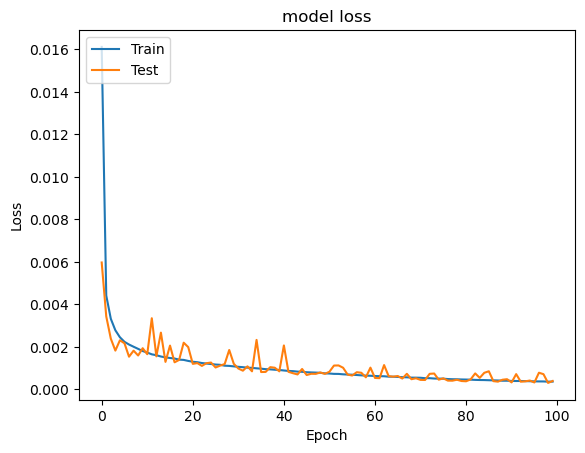

In [62]:
plot_his(history_5)

In [63]:
model_5.evaluate(X_test,Y_test)

1519/1519 [==============================] - 2s 1ms/step - loss: 3.9299e-04 - rmse: 5.4837e-04 - mae: 3.9299e-04 - mse: 3.0070e-07


[0.0003929930680897087,
 0.0005483655841089785,
 0.0003929930680897087,
 3.0070484058342117e-07]

In [64]:
prediction_5 = model_5.predict(X_test)

1519/1519 [==============================] - 1s 797us/step


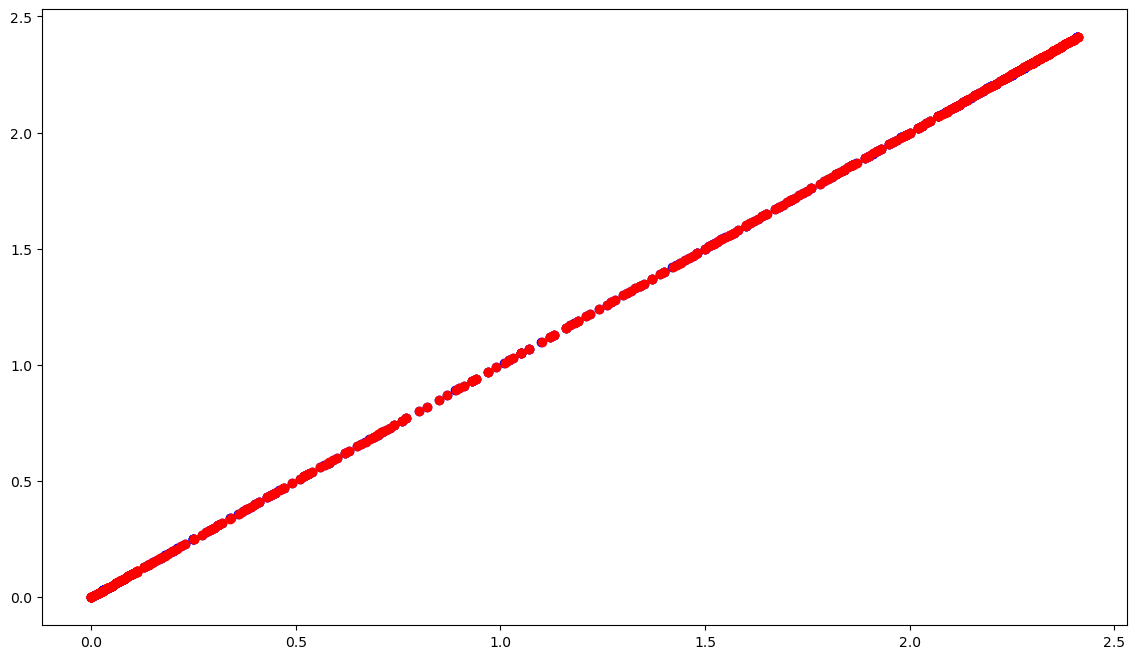

In [65]:
plt.figure(figsize=(14,8))
plt.scatter(Y_test[300:900], Y_test[300:900], color='blue')
plt.scatter(prediction_5[300:900], prediction_5[300:900], color='red')
plt.show()

In [ ]:
plt.figure(figsize=(14,8))
plt.scatter(X_test['Time'],Y_test,color='blue')
plt.scatter(X_test['Time'],prediction_5,color='red',alpha=0.05,linewidths=0.02,style='+')
plt.show()

In [ ]:
sns.lineplot(X_test['Time'],Y_test)
sns.lineplot(x = "Time", y = "Y_test", data=X_test,Y_test)
plt.show()

## Model 6

In [67]:
%%time
model_6 = tf.keras.Sequential([tf.keras.layers.Conv1D(10,3,activation='relu',input_shape=(6,1)),
                               tf.keras.layers.Conv1D(10,2,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(16,activation="linear"),
                               tf.keras.layers.Dense(1,activation = 'linear')])

model_6.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005,decay=0.001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse'])

history_6 = model_6.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test),callbacks = callback)

Epoch 1/100
6073/6073 [==============================] - 11s 2ms/step - loss: 0.0302 - rmse: 0.1768 - mae: 0.0302 - mse: 0.0312 - val_loss: 0.0041 - val_rmse: 0.0069 - val_mae: 0.0041 - val_mse: 4.7300e-05
Epoch 2/100
6073/6073 [==============================] - 10s 2ms/step - loss: 0.0040 - rmse: 0.0067 - mae: 0.0040 - mse: 4.5194e-05 - val_loss: 0.0039 - val_rmse: 0.0065 - val_mae: 0.0039 - val_mse: 4.2096e-05
Epoch 3/100
6073/6073 [==============================] - 10s 2ms/step - loss: 0.0038 - rmse: 0.0063 - mae: 0.0038 - mse: 3.9480e-05 - val_loss: 0.0037 - val_rmse: 0.0062 - val_mae: 0.0037 - val_mse: 3.8603e-05
Epoch 4/100
6073/6073 [==============================] - 10s 2ms/step - loss: 0.0036 - rmse: 0.0060 - mae: 0.0036 - mse: 3.6380e-05 - val_loss: 0.0035 - val_rmse: 0.0059 - val_mae: 0.0035 - val_mse: 3.4808e-05
Epoch 5/100
6073/6073 [==============================] - 10s 2ms/step - loss: 0.0035 - rmse: 0.0059 - mae: 0.0035 - mse: 3.4308e-05 - val_loss: 0.0035 - val_rmse: 0

Epoch 40/100
6073/6073 [==============================] - 10s 2ms/step - loss: 0.0029 - rmse: 0.0046 - mae: 0.0029 - mse: 2.1424e-05 - val_loss: 0.0029 - val_rmse: 0.0046 - val_mae: 0.0029 - val_mse: 2.0901e-05
Epoch 41/100
6073/6073 [==============================] - 10s 2ms/step - loss: 0.0029 - rmse: 0.0046 - mae: 0.0029 - mse: 2.1321e-05 - val_loss: 0.0029 - val_rmse: 0.0046 - val_mae: 0.0029 - val_mse: 2.0815e-05
Epoch 42/100
6073/6073 [==============================] - 10s 2ms/step - loss: 0.0029 - rmse: 0.0046 - mae: 0.0029 - mse: 2.1183e-05 - val_loss: 0.0029 - val_rmse: 0.0045 - val_mae: 0.0029 - val_mse: 2.0679e-05
Epoch 43/100
6073/6073 [==============================] - 10s 2ms/step - loss: 0.0029 - rmse: 0.0046 - mae: 0.0029 - mse: 2.1082e-05 - val_loss: 0.0029 - val_rmse: 0.0045 - val_mae: 0.0029 - val_mse: 2.0564e-05
Epoch 44/100
6073/6073 [==============================] - 10s 2ms/step - loss: 0.0029 - rmse: 0.0046 - mae: 0.0029 - mse: 2.0962e-05 - val_loss: 0.0029 - va

Epoch 79/100
6073/6073 [==============================] - 10s 2ms/step - loss: 0.0028 - rmse: 0.0043 - mae: 0.0028 - mse: 1.8389e-05 - val_loss: 0.0028 - val_rmse: 0.0042 - val_mae: 0.0028 - val_mse: 1.8046e-05
Epoch 80/100
6073/6073 [==============================] - 10s 2ms/step - loss: 0.0028 - rmse: 0.0043 - mae: 0.0028 - mse: 1.8342e-05 - val_loss: 0.0028 - val_rmse: 0.0042 - val_mae: 0.0028 - val_mse: 1.7981e-05
Epoch 81/100
6073/6073 [==============================] - 10s 2ms/step - loss: 0.0028 - rmse: 0.0043 - mae: 0.0028 - mse: 1.8282e-05 - val_loss: 0.0028 - val_rmse: 0.0042 - val_mae: 0.0028 - val_mse: 1.8037e-05
Epoch 82/100
6073/6073 [==============================] - 10s 2ms/step - loss: 0.0028 - rmse: 0.0043 - mae: 0.0028 - mse: 1.8236e-05 - val_loss: 0.0028 - val_rmse: 0.0042 - val_mae: 0.0028 - val_mse: 1.7868e-05
Epoch 83/100
6073/6073 [==============================] - 10s 2ms/step - loss: 0.0028 - rmse: 0.0043 - mae: 0.0028 - mse: 1.8190e-05 - val_loss: 0.0028 - va

In [68]:
model_6.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 4, 10)             40        
                                                                 
 conv1d_5 (Conv1D)           (None, 3, 10)             210       
                                                                 
 flatten_2 (Flatten)         (None, 30)                0         
                                                                 
 dense_49 (Dense)            (None, 16)                496       
                                                                 
 dense_50 (Dense)            (None, 1)                 17        
                                                                 
Total params: 763
Trainable params: 763
Non-trainable params: 0
_________________________________________________________________


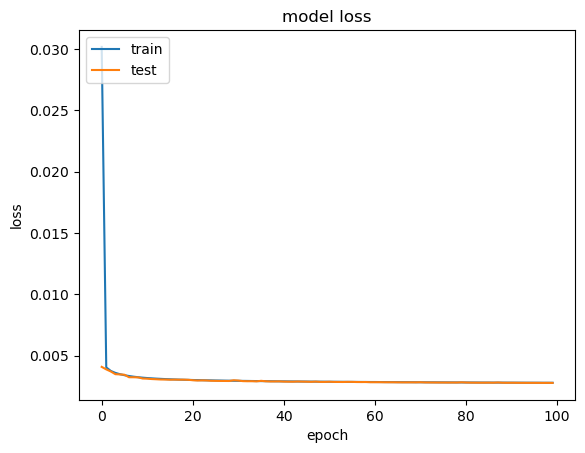

In [69]:
plt.plot(history_6.history['loss'])
plt.plot(history_6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1519/1519 [==============================] - 1s 765us/step


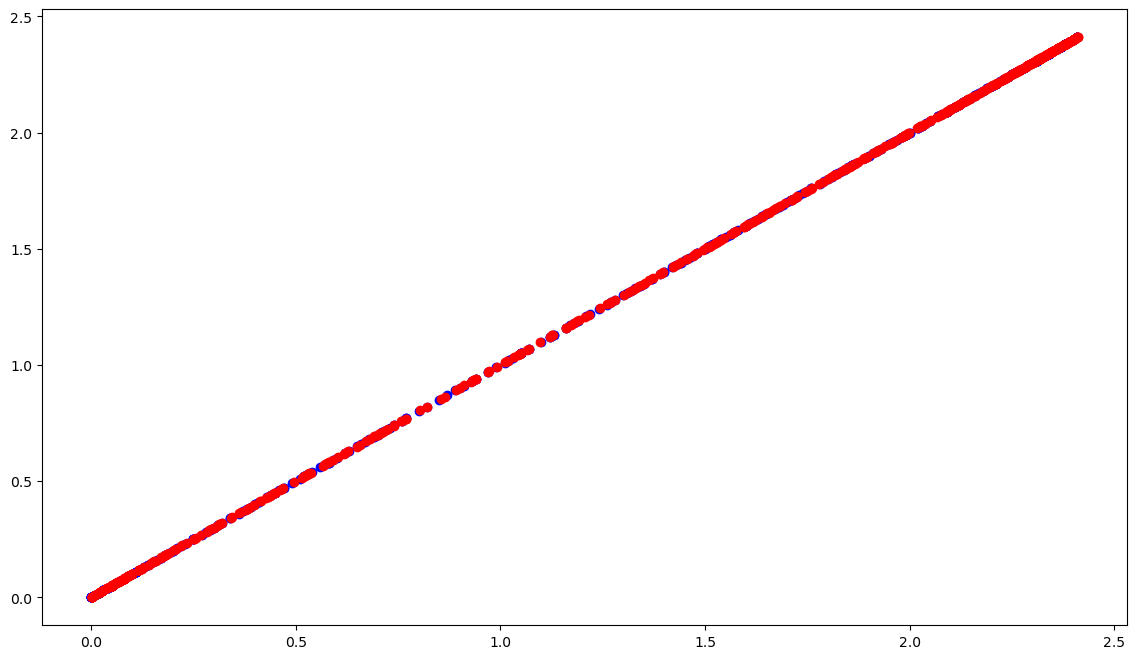

In [70]:
prediction_6 = model_6.predict(X_test)
plt.figure(figsize=(14,8))
plt.scatter(Y_test[300:900], Y_test[300:900], color='blue')
plt.scatter(prediction_6[300:900], prediction_6[300:900], color='red')
plt.show()

## Model 7 (Best)

In [89]:
%%time
model_7 = tf.keras.Sequential([tf.keras.layers.Conv1D(64,3,activation='relu',input_shape=(6,1)),
                               tf.keras.layers.Conv1D(32,2,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(32,activation="relu"),
                               tf.keras.layers.Dense(16,activation="relu"),
                               tf.keras.layers.Dense(1,activation ='linear')])

model_7.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse'])

history_7 = model_7.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test))

Epoch 1/100
6073/6073 [==============================] - 14s 2ms/step - loss: 0.0851 - rmse: 0.3453 - mae: 0.0851 - mse: 0.1192 - val_loss: 0.0043 - val_rmse: 0.0050 - val_mae: 0.0043 - val_mse: 2.5144e-05
Epoch 2/100
6073/6073 [==============================] - 12s 2ms/step - loss: 0.0026 - rmse: 0.0033 - mae: 0.0026 - mse: 1.0722e-05 - val_loss: 0.0026 - val_rmse: 0.0032 - val_mae: 0.0026 - val_mse: 1.0262e-05
Epoch 3/100
6073/6073 [==============================] - 13s 2ms/step - loss: 0.0026 - rmse: 0.0032 - mae: 0.0026 - mse: 1.0485e-05 - val_loss: 0.0022 - val_rmse: 0.0028 - val_mae: 0.0022 - val_mse: 7.9533e-06
Epoch 4/100
6073/6073 [==============================] - 12s 2ms/step - loss: 0.0025 - rmse: 0.0031 - mae: 0.0025 - mse: 9.7674e-06 - val_loss: 0.0027 - val_rmse: 0.0034 - val_mae: 0.0027 - val_mse: 1.1534e-05
Epoch 5/100
6073/6073 [==============================] - 13s 2ms/step - loss: 0.0025 - rmse: 0.0031 - mae: 0.0025 - mse: 9.8782e-06 - val_loss: 0.0057 - val_rmse: 0

Epoch 40/100
6073/6073 [==============================] - 12s 2ms/step - loss: 0.0021 - rmse: 0.0026 - mae: 0.0021 - mse: 6.7839e-06 - val_loss: 0.0015 - val_rmse: 0.0018 - val_mae: 0.0015 - val_mse: 3.3673e-06
Epoch 41/100
6073/6073 [==============================] - 12s 2ms/step - loss: 0.0020 - rmse: 0.0026 - mae: 0.0020 - mse: 6.5092e-06 - val_loss: 0.0013 - val_rmse: 0.0017 - val_mae: 0.0013 - val_mse: 2.7243e-06
Epoch 42/100
6073/6073 [==============================] - 13s 2ms/step - loss: 0.0020 - rmse: 0.0026 - mae: 0.0020 - mse: 6.5822e-06 - val_loss: 0.0013 - val_rmse: 0.0017 - val_mae: 0.0013 - val_mse: 2.8339e-06
Epoch 43/100
6073/6073 [==============================] - 14s 2ms/step - loss: 0.0020 - rmse: 0.0026 - mae: 0.0020 - mse: 6.5296e-06 - val_loss: 0.0018 - val_rmse: 0.0021 - val_mae: 0.0018 - val_mse: 4.5575e-06
Epoch 44/100
6073/6073 [==============================] - 13s 2ms/step - loss: 0.0020 - rmse: 0.0025 - mae: 0.0020 - mse: 6.4009e-06 - val_loss: 0.0035 - va

Epoch 79/100
6073/6073 [==============================] - 12s 2ms/step - loss: 0.0017 - rmse: 0.0022 - mae: 0.0017 - mse: 4.6596e-06 - val_loss: 0.0037 - val_rmse: 0.0040 - val_mae: 0.0037 - val_mse: 1.5623e-05
Epoch 80/100
6073/6073 [==============================] - 13s 2ms/step - loss: 0.0017 - rmse: 0.0021 - mae: 0.0017 - mse: 4.5467e-06 - val_loss: 0.0017 - val_rmse: 0.0020 - val_mae: 0.0017 - val_mse: 4.0769e-06
Epoch 81/100
6073/6073 [==============================] - 14s 2ms/step - loss: 0.0017 - rmse: 0.0021 - mae: 0.0017 - mse: 4.4124e-06 - val_loss: 0.0021 - val_rmse: 0.0024 - val_mae: 0.0021 - val_mse: 5.8988e-06
Epoch 82/100
6073/6073 [==============================] - 13s 2ms/step - loss: 0.0017 - rmse: 0.0022 - mae: 0.0017 - mse: 4.6593e-06 - val_loss: 0.0039 - val_rmse: 0.0042 - val_mae: 0.0039 - val_mse: 1.7267e-05
Epoch 83/100
6073/6073 [==============================] - 13s 2ms/step - loss: 0.0017 - rmse: 0.0021 - mae: 0.0017 - mse: 4.4074e-06 - val_loss: 0.0031 - va

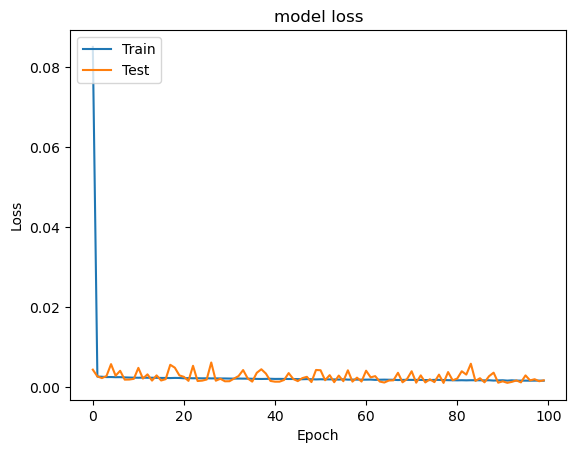

In [90]:
plot_his(history_7)

1519/1519 [==============================] - 2s 1ms/step


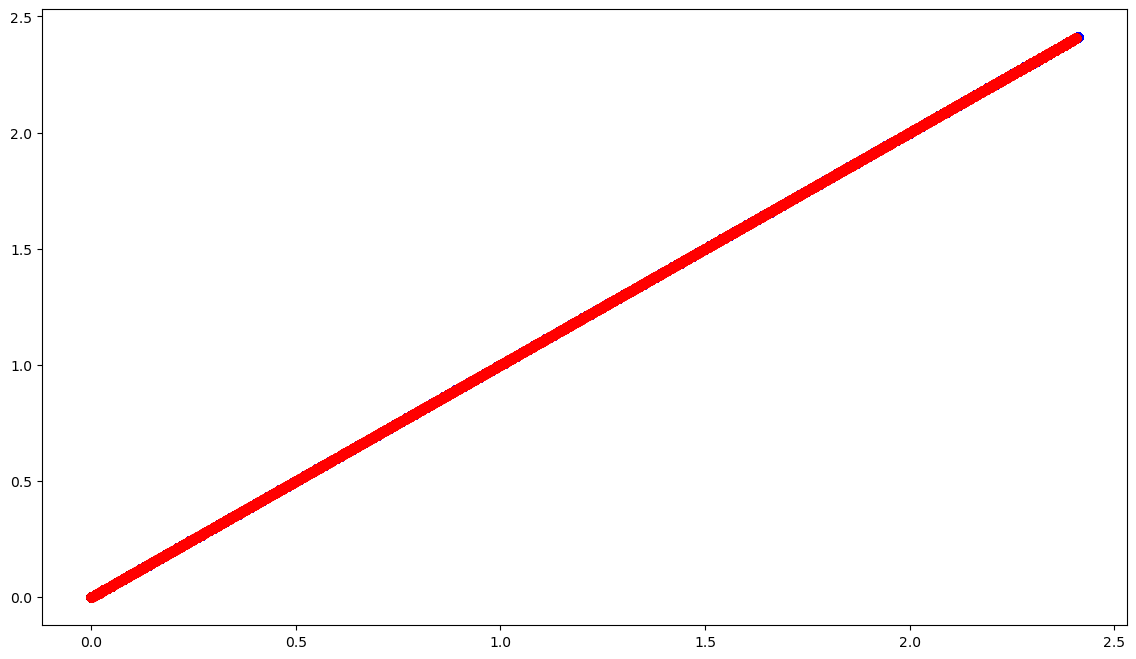

In [91]:
prediction_7 = model_7.predict(X_test)
plt.figure(figsize=(14,8))
plt.scatter(Y_test, Y_test, color='blue')
plt.scatter(prediction_7, prediction_7, color='red')
plt.show()

In [93]:
model_7.evaluate(X_test,Y_test)

1519/1519 [==============================] - 2s 1ms/step - loss: 0.0017 - rmse: 0.0021 - mae: 0.0017 - mse: 4.3017e-06


[0.0016743926098570228,
 0.002074055140838027,
 0.0016743926098570228,
 4.30170439358335e-06]

## Model 8 (Best)

In [94]:
%%time
model_8 = tf.keras.Sequential([tf.keras.layers.Conv1D(32,3,activation='relu',input_shape=(6,1)),
                               tf.keras.layers.Conv1D(8,2,activation='relu'),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(5),
                               tf.keras.layers.Dense(1,activation = 'linear')])

model_8.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,decay=0.0001),
                metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse'),'mae','mse'])

history_8 = model_8.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test))

Epoch 1/100
6073/6073 [==============================] - 11s 2ms/step - loss: 0.0222 - rmse: 0.1336 - mae: 0.0222 - mse: 0.0178 - val_loss: 0.0034 - val_rmse: 0.0043 - val_mae: 0.0034 - val_mse: 1.8915e-05
Epoch 2/100
6073/6073 [==============================] - 11s 2ms/step - loss: 0.0037 - rmse: 0.0047 - mae: 0.0037 - mse: 2.1758e-05 - val_loss: 0.0027 - val_rmse: 0.0034 - val_mae: 0.0027 - val_mse: 1.1489e-05
Epoch 3/100
6073/6073 [==============================] - 10s 2ms/step - loss: 0.0034 - rmse: 0.0042 - mae: 0.0034 - mse: 1.7800e-05 - val_loss: 0.0035 - val_rmse: 0.0043 - val_mae: 0.0035 - val_mse: 1.8310e-05
Epoch 4/100
6073/6073 [==============================] - 10s 2ms/step - loss: 0.0031 - rmse: 0.0039 - mae: 0.0031 - mse: 1.5356e-05 - val_loss: 0.0026 - val_rmse: 0.0032 - val_mae: 0.0026 - val_mse: 1.0044e-05
Epoch 5/100
6073/6073 [==============================] - 10s 2ms/step - loss: 0.0030 - rmse: 0.0038 - mae: 0.0030 - mse: 1.4449e-05 - val_loss: 0.0026 - val_rmse: 0

Epoch 40/100
6073/6073 [==============================] - 9s 1ms/step - loss: 0.0023 - rmse: 0.0029 - mae: 0.0023 - mse: 8.3575e-06 - val_loss: 0.0023 - val_rmse: 0.0029 - val_mae: 0.0023 - val_mse: 8.3834e-06
Epoch 41/100
6073/6073 [==============================] - 9s 1ms/step - loss: 0.0023 - rmse: 0.0029 - mae: 0.0023 - mse: 8.3060e-06 - val_loss: 0.0022 - val_rmse: 0.0028 - val_mae: 0.0022 - val_mse: 7.6313e-06
Epoch 42/100
6073/6073 [==============================] - 10s 2ms/step - loss: 0.0023 - rmse: 0.0029 - mae: 0.0023 - mse: 8.2702e-06 - val_loss: 0.0022 - val_rmse: 0.0028 - val_mae: 0.0022 - val_mse: 7.9442e-06
Epoch 43/100
6073/6073 [==============================] - 9s 2ms/step - loss: 0.0023 - rmse: 0.0029 - mae: 0.0023 - mse: 8.2404e-06 - val_loss: 0.0023 - val_rmse: 0.0028 - val_mae: 0.0023 - val_mse: 7.9593e-06
Epoch 44/100
6073/6073 [==============================] - 9s 1ms/step - loss: 0.0023 - rmse: 0.0029 - mae: 0.0023 - mse: 8.2507e-06 - val_loss: 0.0021 - val_rm

Epoch 79/100
6073/6073 [==============================] - 10s 2ms/step - loss: 0.0022 - rmse: 0.0028 - mae: 0.0022 - mse: 7.7910e-06 - val_loss: 0.0021 - val_rmse: 0.0027 - val_mae: 0.0021 - val_mse: 7.4455e-06
Epoch 80/100
6073/6073 [==============================] - 10s 2ms/step - loss: 0.0022 - rmse: 0.0028 - mae: 0.0022 - mse: 7.7694e-06 - val_loss: 0.0021 - val_rmse: 0.0027 - val_mae: 0.0021 - val_mse: 7.2781e-06
Epoch 81/100
6073/6073 [==============================] - 10s 2ms/step - loss: 0.0022 - rmse: 0.0028 - mae: 0.0022 - mse: 7.7501e-06 - val_loss: 0.0021 - val_rmse: 0.0028 - val_mae: 0.0021 - val_mse: 7.6387e-06
Epoch 82/100
6073/6073 [==============================] - 10s 2ms/step - loss: 0.0022 - rmse: 0.0028 - mae: 0.0022 - mse: 7.7697e-06 - val_loss: 0.0025 - val_rmse: 0.0031 - val_mae: 0.0025 - val_mse: 9.5212e-06
Epoch 83/100
6073/6073 [==============================] - 10s 2ms/step - loss: 0.0022 - rmse: 0.0028 - mae: 0.0022 - mse: 7.7393e-06 - val_loss: 0.0022 - va

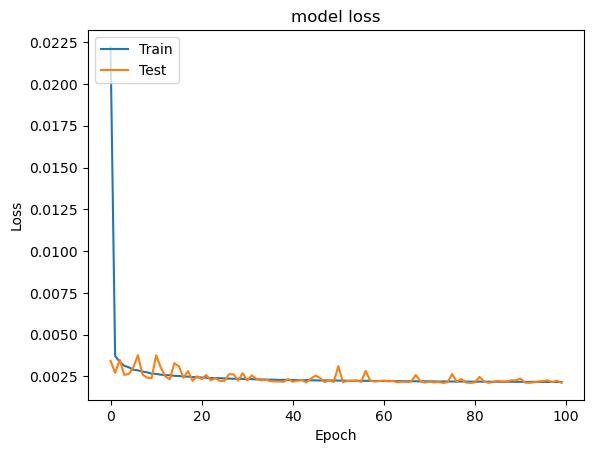

In [95]:
plot_his(history_8)

In [100]:
model_8.evaluate(X_test,Y_test)

1519/1519 [==============================] - 1s 937us/step - loss: 0.0021 - rmse: 0.0027 - mae: 0.0021 - mse: 7.3259e-06


[0.0021157662849873304,
 0.002706635743379593,
 0.0021157662849873304,
 7.325876595132286e-06]

# GPR
GAUSSIAN PROCESS REGRESSION
link - https://www.kaggle.com/code/residentmario/gaussian-process-regression-and-classification

Link_1 = https://www.kaggle.com/discussions/questions-and-answers/47716

Link_2 = https://www.kaggle.com/code/residentmario/gaussian-process-regression-and-classification

Link_3 = https://www.kaggle.com/code/sterby/gaussian-process-regression-benchmark


# SVR
Support vector regressor

In [76]:
from sklearn.svm import SVR, LinearSVR

In [77]:
svr = SVR().fit(X, Y)
print(svr)

SVR()


In [78]:
y_pred_svr = svr.predict(X)

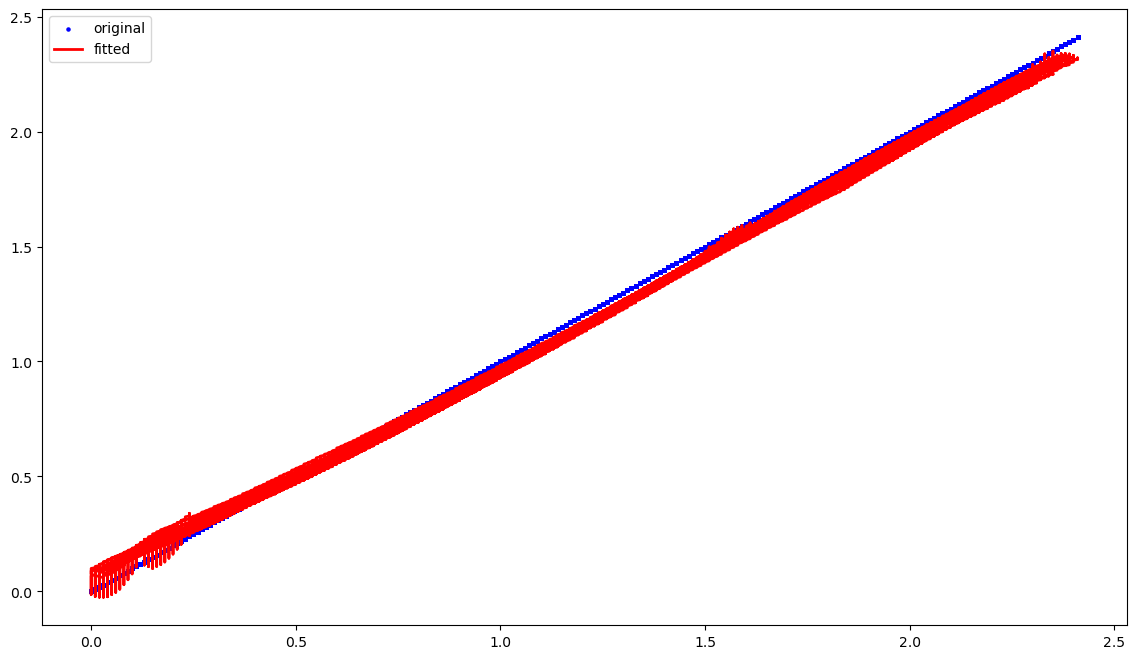

In [79]:
plt.figure(figsize=(14,8))
plt.scatter(Y, Y, s=5, color="blue", label="original")
plt.plot(Y, y_pred_svr, lw=2, color="red", label="fitted")
plt.legend()
plt.show()

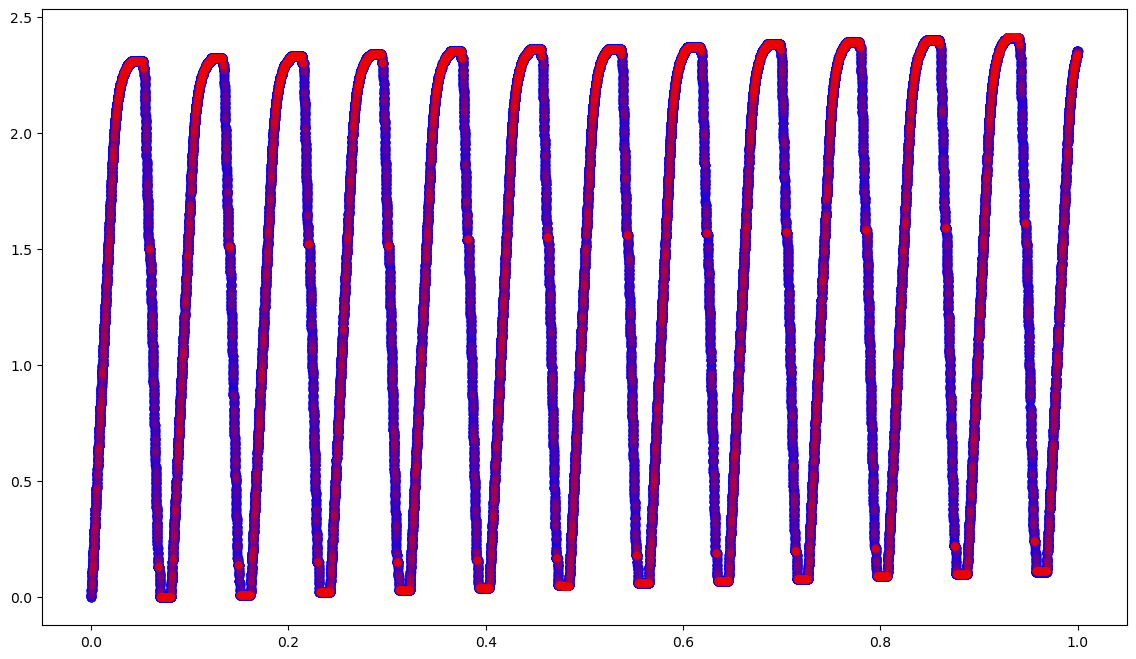

In [80]:
plt.figure(figsize=(14,8))
plt.scatter(X_test['Time'],Y_test,color='blue')
plt.scatter(X_test['Time'],prediction_5,color='red',alpha=0.05,linewidths=0.02)
plt.show()

In [81]:
from sklearn.metrics import mean_squared_error
score = svr.score(X,Y)
print("R-squared:", score)
print("MSE:", mean_squared_error(Y, y_pred_svr))

R-squared: 0.9971697064502795
MSE: 0.0022140910558290467


In [82]:
kernel = ['linear','rbf']        # For both the kernel
for i in kernel:
  model = SVR(kernel=i,C=1.0)
  model.fit(X_train,Y_train)
  print(f"For Kernel {i}")
  print("Accuracy is :", model.score(X_test,Y_test))

For Kernel linear
Accuracy is : 0.9942634389857278
For Kernel rbf
Accuracy is : 0.9971501702778978


# RandomForest

link_1 = https://levelup.gitconnected.com/random-forest-regression-209c0f354c84

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [84]:
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)
y_pred_rf = rf.predict(X_test)

In [85]:
rf.score(X_test,Y_test)

0.9999999997040998

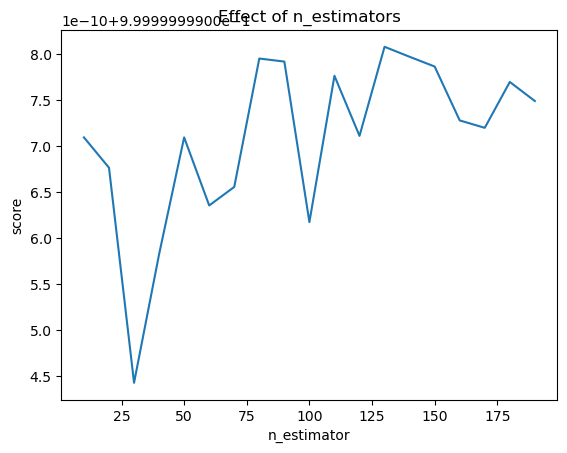

In [86]:
model = RandomForestRegressor()
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, Y_train)
    scores.append(model.score(X_test, Y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [87]:
for i in scores:
  print(f"score is : {i}")

score is : 0.999999999709643
score is : 0.9999999996766479
score is : 0.9999999994427492
score is : 0.9999999995826118
score is : 0.999999999709643
score is : 0.9999999996355873
score is : 0.9999999996557735
score is : 0.9999999997954303
score is : 0.9999999997920901
score is : 0.9999999996175206
score is : 0.9999999997766149
score is : 0.9999999997112927
score is : 0.9999999998081989
score is : 0.9999999997973157
score is : 0.9999999997867196
score is : 0.9999999997280996
score is : 0.9999999997200553
score is : 0.9999999997699304
score is : 0.9999999997492006


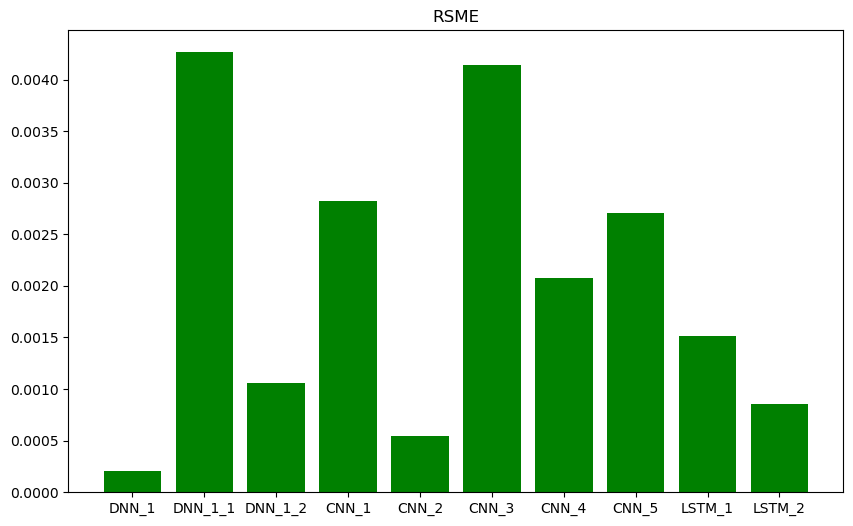

In [113]:

rmse_score = {'DNN_1':0.0002110,'DNN_1_1':0.0042638,'DNN_1_2':0.0010581,'CNN_1':0.0028263,'CNN_2':0.000548365,
              'CNN_3':0.00414460,'CNN_4':0.00207405,'CNN_5':0.002706635,'LSTM_1':0.0015119,
             'LSTM_2':0.00085137}
names = list(rmse_score.keys())
values = list(rmse_score.values())


plt.figure(figsize=(10,6))
plt.bar(range(len(rmse_score)), values, tick_label=names,color='green')

plt.title('RSME')
plt.show()

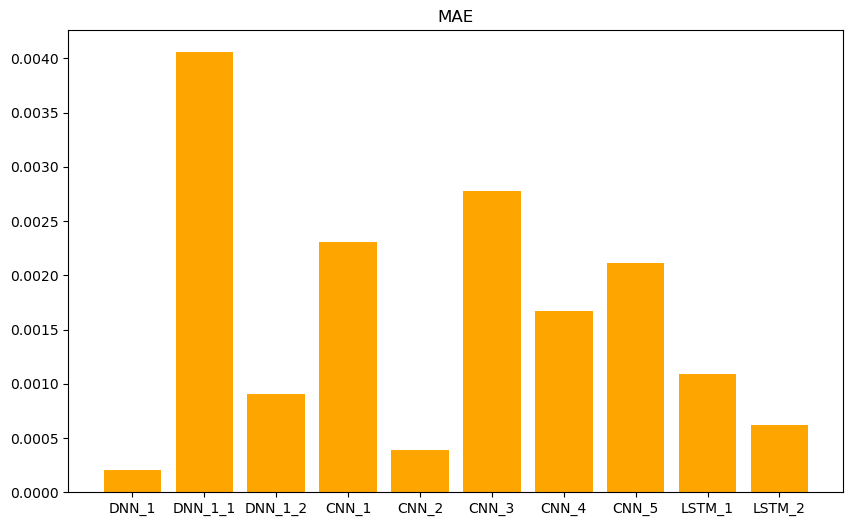

In [112]:
mae_score = {'DNN_1':0.000201956,'DNN_1_1':0.004056,'DNN_1_2': 0.00090394,'CNN_1':0.00230649,'CNN_2':0.00039299,
              'CNN_3':0.0027733,'CNN_4':0.00167439,'CNN_5':0.002115766,'LSTM_1':0.0010934,
             'LSTM_2':0.00062048}

names_mae = list(mae_score.keys())
values_mae = list(mae_score.values())

plt.figure(figsize=(10,6))
plt.bar(range(len(mae_score)), values_mae, tick_label=names_mae,color='orange')
plt.title('MAE')
plt.show()